In [6]:
using Plots, ApproxFun, SingularIntegralEquations, DifferentialEquations, ComplexPhasePortrait
gr();

# M3M6: Methods of Mathematical Physics 2018

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
\def\pr(#1){\left({#1}\right)}
\def\br[#1]{\left[{#1}\right]}
\def\set#1{\left\{{#1}\right\}}
\def\ip<#1>{\left\langle{#1}\right\rangle}
\def\iip<#1>{\left\langle\!\langle{#1}\right\rangle\!\rangle}
$$

Dr Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes

# Solution Sheet 2


## Problem 1.1


### 1.

Take as an initial guess
$$
 \phi_1(z) = {\sqrt{z-1} \sqrt{z+1}  \over 2\I(1 + z^2)}
$$
This satisfies for $-1 < x < 1$
$$
\phi_1^+(x) -\phi_1^-(x) = { \sqrt{1-x^2}  \over 2(1 + x^2)} -  {- \sqrt{1-x^2}  \over 2(1 + x^2)} = {\sqrt{1 - x^2} \over 1+x^2}
$$

Further, as $z \rightarrow \infty$, 
$$
\phi_1(z) \sim {z \over \I(1+ z^2)} \rightarrow 0
$$

The catch is that it has poles at $\pm \I$:
\begin{align*}
    \phi_1(z) = -{\sqrt{\I -1} \sqrt{\I+1} \over 4} { 1 \over z - \I} + O(1)  \\
    \phi_1(z) = {\sqrt{-\I -1} \sqrt{-\I+1} \over 4} { 1 \over z + \I} + O(1)     
\end{align*}
Thus it follows that
$$
\phi(z) =  \phi_1(z) + {\sqrt{\I -1} \sqrt{\I+1} \over 4} { 1 \over z - \I} - {\sqrt{-\I -1} \sqrt{-\I+1} \over 4} { 1 \over z + \I}
$$
is 
 1. Analytic at $\pm \I$ and off $[-1,1]$ (Analyticity)
 2. $\phi(\infty) = 0$ (Decay)
 3. Has weaker than pole singularities (Regularity)
 4. Satisfies
$$
\phi_+(x) - \phi_-(x) = {\sqrt{1-x^2} \over 1+x^2}
$$
 
By Plemelj II, this must be the Cauchy transform.

_Demonstration_ We will see experimentally that it correct. First we do a phase plot to make sure we satisfy (Analyticity):

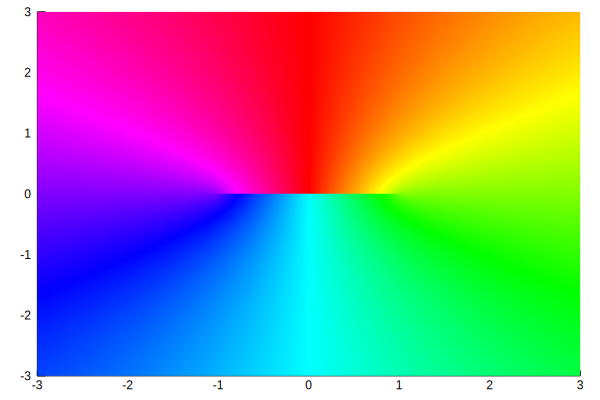

In [7]:
φ = z -> sqrt(z-1)sqrt(z+1)/(2im*(1+z^2)) + 
        sqrt(im-1)sqrt(im+1)/4*1/(z-im) - 
        sqrt(-im-1)sqrt(-im+1)/4*1/(z+im)

phaseplot(-3..3, -3..3, φ)

We can also see from the phase plot (Regularity): we have weaker than pole singularities, otherwise we would have at least a full,counter clockwise colour wheel. We can check decay as well:

In [8]:
φ(200.0+200.0im)

0.0005177682933717976 + 0.000517765612545622im

Finally, we compare it numerically it to `cauchy(f, z)` which is implemented in SingularIntegralEquations.jl:

In [9]:
φ(2.0+2.0im)

0.05303535516221752 + 0.05036581190871381im

In [10]:
x = Fun()
cauchy(sqrt(1-x^2)/(1+x^2), 2.0+2.0im)

0.0530353551622175 + 0.050365811908713795im

### 2.

Recall that
$$
\psi(z) = {\log(z-1) - \log(z+1)  \over 2 \pi \I}
$$
satisfies
$$
\psi_+(x) - \psi_-(x) = 1
$$
Therefore, consider
$$
\phi_1(z) = {\psi(z) \over 2 + z}
$$
This has the right jump, but has an extra pole at $z = -2$: for $x < -1$ we have
$$
\phi_1(x) = {\log_+(x-1) - \log_+(x+1)  \over 2 \pi \I} {1 \over 2 + x} = 
   {\log(1-x) - \log(-1-x)  \over 2 \pi \I} {1 \over 2 + x}
$$
hence we arrive at the solution
$$
\phi_1(z) - {\log 3 \over 2 \pi \I (2+z)}
$$
We can verify that $\phi_1(\infty) = 0$.

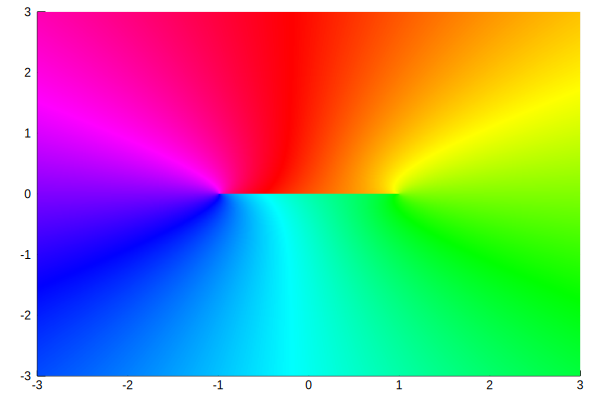

In [11]:
φ =  z -> (log(z-1)-log(z+1)) / ((2π*im)*(2+z)) - log(3)/(2π*im*(2+z))

phaseplot(-3..3, -3..3, φ)

In [12]:
φ(2.0+2.0im)

0.0416136101650096 + 0.04191488519537722im

In [13]:
cauchy(1/(2+x), 2.0+2.0im)

0.041613610165009585 + 0.04191488519537721im

### 4. 

We first calculate the Cauchy transform of $f(x) = x/\sqrt{1-x^2}$:
$$
\phi(z) = {\I z  \over 2 \sqrt{z -1} \sqrt{z+1}} - {\I \over 2}
$$
This vanishes at $\infty$ and has the correct jump. We then have
$$
-\I{\cal H}f(x) = \phi^+(x) + \phi^-(x) = -\I
$$
This implies that 
$$
\dashint_{-1}^1 {t \over (t-x) \sqrt{1-t^2}} \dt = \pi \HH f(x) = \pi
$$

In [14]:
f = x/sqrt(1-x^2)
π*hilbert(f, 0.1)

3.141592653589793

## Problem 1.2

### 1.2.1

From Problem 1.1 part 4, we have a solution: 
$$
\phi(z) = -{ z  \over 2 \sqrt{z -1} \sqrt{z+1}} + {1 \over 2}
$$
All other solutions are then of the form:
$$
\phi(z) + {C \over \sqrt{z-1} \sqrt{z+1}}
$$

In [15]:
C = randn()
φ = z -> -z/(2*sqrt(z-1)*sqrt(z+1))+1/2 + C/(sqrt(z-1)*sqrt(z+1))

#11 (generic function with 1 method)

In [16]:
φ(0.1+0.0im)+φ(0.1-0.0im)

1.0 + 0.0im

In [17]:
φ(1E8)

2.1249130872220166e-8

### 1.2.2

$\psi(z) = \phi(z) - 1$ satifies 
$$
\psi_+(x) + \psi_-(x) = -2, \psi(\infty) = 0
$$
hence we know that $\psi(z) = { z  \over  \sqrt{z -1} \sqrt{z+1}} - 1 + {C \over \sqrt{z-1} \sqrt{z+1}}$, giving 
$$
\psi(z) = { z  \over  \sqrt{z -1} \sqrt{z+1}} + {C \over \sqrt{z-1} \sqrt{z+1}} + 1
$$

In [18]:
C = randn()
φ = z -> z/(sqrt(z-1)*sqrt(z+1)) + C/(sqrt(z-1)*sqrt(z+1)) 

#13 (generic function with 1 method)

In [19]:
φ(0.1+0.0im)+φ(0.1-0.0im)

0.0 + 0.0im

In [20]:
φ(1E9)

0.9999999983329383

### 1.2.3 

For $f(x) = \sqrt{1-\diamond^2}$, we use the formula
$$
\phi(z) = {\I \over \sqrt{z - 1} \sqrt{z+1}} \CC[\sqrt{1-\diamond^2} f](z) + {C \over \sqrt{z-1}\sqrt{z+1}}  = {\I \over \sqrt{z - 1} \sqrt{z+1}} \CC[1-\diamond^2](z) + {C \over \sqrt{z-1}\sqrt{z+1}}
$$
We already know $\CC1(z)$, and we can deduce $\CC[\diamond^2]$ as follows: try
$$
\phi_1(z) = z^2 \CC1(z) = z^2 {\log(z-1) - \log(z+1) \over 2 \pi \I}
$$
this has the right jump, but blows up at $\infty$ like:
$$
x^2 (\log(x-1) - \log(x+1)) = x^2 (\log(1-1/x)  - \log(1+1/x) )
= -2 x + O(x^{-1})
$$
using
$$
\log z = (z-1) - {1\over 2}(z-1)^2 + O(z-1)^3
$$
Thus we have
$$
\CC[\diamond^2](z) = {z^2 (\log(z-1) - \log(z+1)) + 2 z \over 2 \pi \I}
$$
and
$$
\phi(z) = {\I \over \sqrt{z - 1} \sqrt{z+1}} {(1-z^2)(\log(z-1) - \log(z+1)) - 2 z \over 2 \pi \I}  + {C \over \sqrt{z-1}\sqrt{z+1}}
$$

_Demonstration_ Here we see that the Cauchy transform of $x^2$ has the correct formula:

In [21]:
z = 2.0+2.0im
cauchy(x^2, z)

0.028322293739596095 + 0.024377589786690298im

In [22]:
(z^2*(log(z-1)-log(z+1))+2z)/(2π*im)

0.028322293739596032 + 0.02437758978669024im

We now see that $\phi$ has the right jumps:

In [23]:
C = randn()
φ = z -> im/(sqrt(z-1)*sqrt(z+1)) * ((1-z^2)*(log(z-1)-log(z+1))-2z)/(2π*im) + C/(sqrt(z-1)sqrt(z+1))

#15 (generic function with 1 method)

In [24]:
φ(0.1+0.0im) + φ(0.1-0.0im) - sqrt(1-0.1^2)

1.1102230246251565e-16 + 0.0im

Finally, it vanishes at infinity:

In [25]:
φ(1E5)

-1.0949779687205364e-6 - 0.0im

### 1.2.4

Let $f(x) = {1 \over 1+x^2}$. From Problem 1.1 part 1 we know 
$$
\CC[\sqrt{1-\diamond^2}] f(z) = {\sqrt{z-1} \sqrt{z+1}  \over 2\I(1 + z^2)}  + {\sqrt{\I -1} \sqrt{\I+1} \over 4} { 1 \over z - \I} - {\sqrt{-\I -1} \sqrt{-\I+1} \over 4} { 1 \over z + \I}
$$
hence from the solution formula we have
$$
\phi(z) = {1  \over 2(1 + z^2)}  + {\sqrt{\I -1} \sqrt{\I+1} \I \over 4\sqrt{z-1} \sqrt{z+1}} { 1 \over z - \I} - {\sqrt{-\I -1} \sqrt{-\I+1} \I \over 4\sqrt{z-1} \sqrt{z+1}} { 1 \over z + \I} + {C \over \sqrt{z-1} \sqrt{z+1}}
$$

But we want something stronger: that $\phi(z) = O(z^{-2})$. To accomplish this, we need to choose $C$.  Fortunately, I made the problem easy as every term apart from the last one is already $O(z^{-2})$, so choose $C = 0$:

In [26]:
φ = z -> 1/(2*(1+z^2)) + 
        sqrt(im-1)sqrt(im+1)*im/(4sqrt(z-1)sqrt(z+1))*1/(z-im) - 
        sqrt(-im-1)sqrt(-im+1)*im/(4sqrt(z-1)sqrt(z+1))*1/(z+im)

φ(1E5)*1E5^2

-0.2071067812011923 + 0.0im

We see also that it has the right jump:

In [27]:
φ(0.1+0.0im) + φ(0.1-0.0im)

0.9900990099009901 + 0.0im

In [28]:
1/(1+0.1^2)

0.9900990099009901

## Problem 1.3

1. From the Hilbert formula, we know that the general solution of $\HH u = f$ is 
$$
    u(x) =  {-1 \over \sqrt{1 - x^2}}\HH \left[{ f(\diamond)  \sqrt{1-\diamond^2} }\right](x)  - {C \over \sqrt{1-x^2}}
$$  
Plugging in $f(x) = x/\sqrt{1-x^2}$ means we need to calculate
$$
\HH \left[{\diamond}\right](x)
$$
We do so by first finding the Cauchy transform. Consider
$$
\phi_1(z) = z \CC 1(z) = z {\log(z-1) - \log(z+1) \over 2 \pi \I}
$$
This has the right jump:
$$
\phi_1^+(x) - \phi_1^-(x) = x
$$
but doesn't decay at $\infty$:
\begin{align*}
x {\log(x-1) - log(x+1) \over 2 \pi \I} = x {\log x + \log(1-1/x) - \log x -\log(1+1/x) \over 2 \pi \I} \\
= -x { 2 \over x 2 \pi \I}  = -{1 \over \I \pi}
\end{align*}
But this means that
$$
\phi(z) = \phi_1(z) + {1 \over \I \pi} = z {\log(z-1) - \log(z+1) \over 2 \pi \I}  + {1 \over \I \pi}
$$
Decays and has the right jump, hence is $\CC[\diamond](z)$. 

In [29]:
t = Fun()
z = 2.0+2.0im
cauchy(t, z), z*(log(z-1)-log(z+1))/(2π*im) + 1/(im*π)

(0.013174970881571598 - 0.00098617598822645im, 0.013174970881571569 - 0.0009861759882264232im)

Therefore, we have
$$
\HH[\diamond](x) = \I (\CC^+ + \CC^-) \diamond(x) = x {\log(1-x) - \log(1+x) \over \pi} +{2 \over \pi}
$$

In [30]:
x = 0.1
hilbert(t,x), x*(log(1-x)-log(1+x))/(π) + 2/π

(0.6302322257442835, 0.6302322257442834)

Therefore, we get
$$
u(x) = - {x(\log(1-x) - \log(1+x))+2 \over  \pi\sqrt{1-x^2}} - {C \over \sqrt{1-x^2}}
$$
This can be verified in Mathematica via
```mathematica
NIntegrate[-((
   x (Log[1 - x] - Log[1 + x]) + 
    2)/(π Sqrt[1 - x^2] (x - 0.1))), {x, -1, 0.1, 1}, 
  PrincipalValue -> True]/π
```

2. Following the procedure of multiplying $\CC[\sqrt{1-\diamond^2}](z)$ by $1/(2+z)$ and subtracting off the pole at $z=-2$, we first find:
$$
\CC\left[{\sqrt{1-\diamond^2} \over 2+\diamond}\right](z) = {\sqrt{z-1}\sqrt{z+1} - z \over 2\I(2+z)} -{\sqrt{-2-1}_+ \sqrt{-2+1}_+ +2 \over 2\I(2+z)} = {\sqrt{z-1}\sqrt{z+1} - z \over 2\I(2+z)} +{ \sqrt{3} -2 \over 2\I(2+z)} 
$$

In [31]:
t = Fun()
z = 2.0+2.0im
cauchy(sqrt(1-t^2)/(2+t), z), (sqrt(z-1)sqrt(z+1)-z)/(2im*(2+z)) + (sqrt(3)-2)/(2im*(z+2))

(0.03230545315801244 + 0.032449695183223826im, 0.032305453158012455 + 0.032449695183223784im)

Therefore, calculating $\I(\CC^+ + \CC^-)$ we find that
$$
\HH\left[{\sqrt{1-\diamond^2} \over 2+\diamond}\right](z) = -{x\over 2+x} +{ \sqrt{3} -2 \over 2+x} 
$$

In [32]:
x = 0.1
hilbert(sqrt(1-t^2)/(2+t), x), -x/(2+x)+(sqrt(3)-2)/(2+x)

(-0.17521390115767732, -0.17521390115767752)

Thus the general solution is
$$
u(x) = {1 \over \sqrt{1-x^2}} \left( {x\over 2+x} -{ \sqrt{3} -2 \over 2+x} + C \right)
$$
We need to choose $C$ so this is bounded at the right-endpoint: In other words, 
$$
u(x) = {1 \over \sqrt{1-x^2}} \left( {x\over 2+x} -{ \sqrt{3} -2 \over 2+x} +{ \sqrt{3} -3 \over 3}  \right)
$$

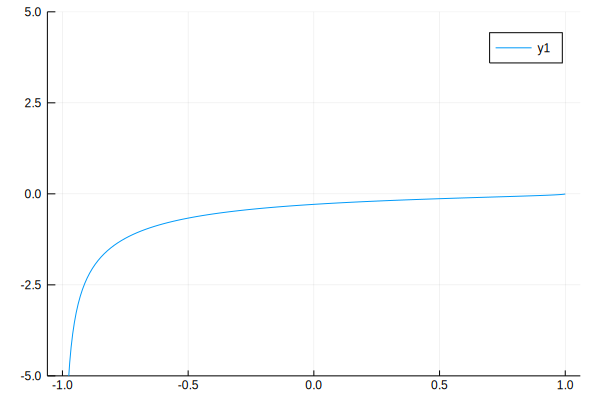

In [33]:
u = (t/(2+t)-(sqrt(3)-2)/(2+t)+(sqrt(3)-3)/3)/sqrt(1-t^2)
plot(u; ylims=(-5,5))

In [34]:
x = 0.1
hilbert(u,x) , 1/(2+x)

(0.4761904761904754, 0.47619047619047616)

## Problem 2.1

Doing the change of variables $\zeta = b s$ we have
$$
\log(ab) = \int_1^{ab} {\D \zeta \over \zeta} = \int_{1/b}^a {\D s \over s}
$$
if $\gamma$ does not surround the origin, we have
$$
0 = \oint_\gamma {\D s \over s} = \left[\int_1^{1/b} + \int_{1/b}^a + \int_a^1\right] {\D s \over s}
$$
which implies 
$$
\log(ab) = \left[-\int_a^1 -\int_1^{1/b} \right] {\D s \over s} = \log a - \log {1 \over b} = \log a + \log b
$$
Here's a picture:

log(a * b) = 1.6094379124341003 - 0.9272952180016122im
log(a) + log(b) = 1.6094379124341003 - 0.9272952180016123im


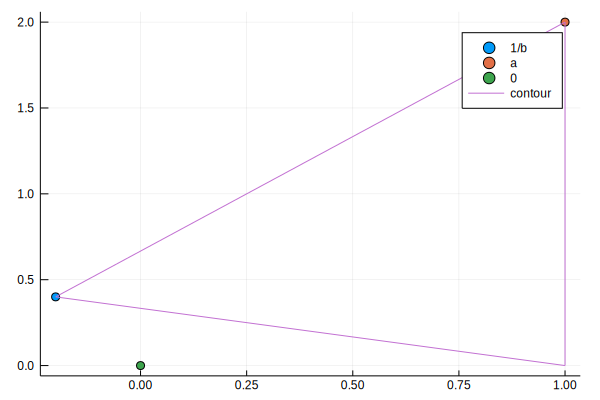

In [35]:
a = 1.0+2.0im
b = -1.0-2.0im

@show log(a*b)
@show log(a) + log(b)


scatter([real(1/b)], [imag(1/b)]; label="1/b")
scatter!([real(a)], [imag(a)]; label="a")
scatter!([0.0], [0.0]; label="0")
plot!(Segment(1, 1/b) ∪ Segment(1/b, a) ∪ Segment(a, 1); label="contour")

If it surrounds the origin counbter-clockwise, that is, it has positive orientation, we have $2\pi \I = \oint_\gamma {\D s \over s}$, which shoes that 
$$
\log(ab) = 2 \pi \I - \left[\int_a^1 +\int_1^{1/b} \right] {\D s \over s} = \log a + \log b + 2\pi \I
$$
and a similar result when counter clockwise.

log(a * b) = 1.8444397270569681 - 2.819842099193151im
(log(a) + log(b)) - (2π) * im = 1.844439727056968 - 2.819842099193151im


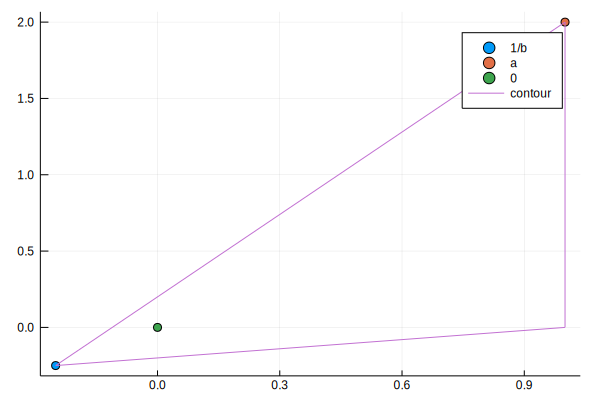

In [36]:
a = 1.0+2.0im
b = -2.0+2.0im

@show log(a*b)
@show log(a) + log(b) - 2π*im
scatter([real(1/b)], [imag(1/b)]; label="1/b")
scatter!([real(a)], [imag(a)]; label="a")
scatter!([0.0], [0.0]; label="0")
plot!(Segment(1, 1/b) ∪ Segment(1/b, a) ∪ Segment(a, 1); label="contour")

If the contour passes through the origin, there are three possibility: 
1.  $[a,1]$ contains zero, hence $a < 0$ 
2. $[1,1/b]$ contains zero, hence $b < 0$
3. $[1/b, a]$ contains zero, which can only be true if $a b < 0$ by considering the equation of the line segment.

1\. In the case where $a < 0$ and $b < 0$ (and hence $a b > 0$), perturbing $a$ above  and $b$ below or vice versa avoids $\gamma$ winding around zero, so we have
$$
\log(a b) = \log_+ a + \log_- b = \log_- a + \log_+ b = \log_+ a + \log_+ b - 2 \pi \I = \log_- a + \log_- b + 2 \pi \I
$$

In [37]:
a = -2.0
b = -3.0

@show log(a*b)
@show log(a+0.0im) + log(b-0.0im)
@show log(a-0.0im) + log(b+0.0im)
@show log(a-0.0im) + log(b-0.0im) + 2π*im
@show log(a+0.0im) + log(b+0.0im) - 2π*im;

log(a * b) = 1.791759469228055
log(a + 0.0im) + log(b - 0.0im) = 1.791759469228055 + 0.0im
log(a - 0.0im) + log(b + 0.0im) = 1.791759469228055 + 0.0im
log(a - 0.0im) + log(b - 0.0im) + (2π) * im = 1.791759469228055 + 0.0im
(log(a + 0.0im) + log(b + 0.0im)) - (2π) * im = 1.791759469228055 + 0.0im


In the case where $a < 0$ and $b > 0$, then $ a b < 0$, but we can perturb $a$ above/below to get
$$
\log_\pm(a b) = \log_\pm a + \log b
$$
(and by symmetry, the equivalent holds for $b < 0$ and $a > 0$.)

In [38]:
a = -2.0
b = 3.0

@show log(a*b +0.0im)
@show log(a+0.0im) + log(b);

@show log(a*b -0.0im)
@show log(a-0.0im) + log(b);

log(a * b + 0.0im) = 1.791759469228055 + 3.141592653589793im
log(a + 0.0im) + log(b) = 1.791759469228055 + 3.141592653589793im
log(a * b - 0.0im) = 1.791759469228055 - 3.141592653589793im
log(a - 0.0im) + log(b) = 1.791759469228055 - 3.141592653589793im


In the case where $a < 0$, if $\Im b > 0$ we can perturb $a$ below so that $\gamma$ does not contain zero, giving us
$$
\log(ab) = \log_- a + \log b
$$
similarly, if $\Im b < 0$ we can perturb $a$ above.

In [39]:
a = -2.0
b = 3.0 + im

@show log(a*b)
@show log(a-0.0im) + log(b);

b = 3.0 + im;
@show log(a*b)
@show log(a+0.0im) + log(b);

log(a * b) = 1.8444397270569681 - 2.819842099193151im
log(a - 0.0im) + log(b) = 1.8444397270569683 - 2.819842099193151im
log(a * b) = 1.8444397270569681 - 2.819842099193151im
log(a + 0.0im) + log(b) = 1.8444397270569683 + 3.4633432079864352im


2\. In this case, swap the role of $a$ and $b$ and use the answers for $a < 0$. 

3\. Finally, we have the case $a b < 0$ and neither $a$ nor $b$ is real. Note that
$$
ab = (a_x + \I a_y) (b_x + \I b_y) = a_x b_x - a_y b_y +  \I(a_x b_y + a_yb_x)
$$
It follows if $b_x > 0$ we have
$$
(ab)_+ = a_+ b
$$
and if $b_x < 0$ we have
$$
(ab)_+ = a_- b
$$

In [40]:
a = 1.0 + 1.0im
b = 1.0 + 1.0im
@show log(a*b +  eps()im) 
@show log((a+eps()im)*b)

log(a * b + eps() * im) = 0.6931471805599453 + 1.5707963267948966im
log((a + eps() * im) * b) = 0.6931471805599453 + 1.5707963267948968im


0.6931471805599453 + 1.5707963267948968im

In [41]:
a = 1.0 + 1.0im
b = -1.0 + 1.0im
@show log(a*b +  eps()im) 
@show log((a-eps()im)*b)

log(a * b + eps() * im) = 0.6931471805599453 + 3.141592653589793im
log((a - eps() * im) * b) = 0.6931471805599452 + 3.141592653589793im


0.6931471805599452 + 3.141592653589793im

We can use this perturbation to reduce to the previous cases. For example, if $a = 1 + \I$ and $b = -1 + \I$, pertubing $ab$ above causes $a$ to be perturbed  above, which causes the contour to surround the origin clockwise, hence we have
$$
\log_+(ab) = \log(a)_+b = \log a b - 2 \pi \I
$$

In [42]:
a = 1.0 + 1.0im
b = -1.0 + 1.0im
@show log(a*b -  eps()im) 
@show log(a)+log(b)-2π*im;

log(a * b - eps() * im) = 0.6931471805599453 - 3.141592653589793im
(log(a) + log(b)) - (2π) * im = 0.6931471805599453 - 3.141592653589793im


## Problem 2.2

Use the contour $\gamma(t) = 1 + t(1-z)$ to reduce it to a normal integral:
$$\overline{\log z } = \overline{\int_1^z {1 \over \zeta} \D \zeta} = \overline{\int_0^1 {(z-1) \over 1+(z-1) t} \dt}  = \int_0^1 {(\bar z-1) \over 1+(\bar z-1) t} \dt = \int_1^{\bar z} {\D \zeta \over \zeta} = \log \bar z.$$
We then have, since the contour from $1$ to $1/(\bar z)$ to $z$ never surrounds the origin since both $\Im z$ and $\Im 1/(\bar z)$ have the same sign, we have 
$$
2 \Re \log z = \log z + \overline{\log z} = \log z + \log \bar z = \log z \bar z = \log |z|^2 = 2 \log |z|
$$
On the other hand, we have, where the contour of integration is chosen to be to the right of zero and then we do the change of variables $\zeta = |z| \E^{\I \theta}$
$$
2 \Im \log z = \log z - \log \bar z = \int_{\bar z}^z {\D \zeta \over \zeta} = \I \int_{-\arg z}^{\arg z} \D \theta = 2 \I \arg z
$$


## Problem 2.3

We first show that it is analytic on $(-\infty,0)$. To do this, we need to show that the limit from above equals the limit from below: for $x < 0$ we have
$$\log_1^+ x -\log_1^- x = \log_+x - \log_- x +2 \pi \I = 0$$
Then for $x > 0$ and using $\log_1^\pm(x) = \lim_{\epsilon\rightarrow 0} \log(x\pm \I \epsilon)$ we find
$$
\log_1^+(x) - \log_1^-x = \log x- \log x- 2\pi \I = -2 \pi \I
$$

_Demonstration_ Here we see that the following is the analytic continuation:

In [43]:
log1 = z -> begin
    if imag(z) > 0 
        log(z)
    elseif imag(z) == 0 && real(z) < 0
        log(z + 0.0im)
    elseif imag(z) < 0
        log(z) + 2π*im
    else
            error("log1 not defined on real axis")
    end
end

#19 (generic function with 1 method)

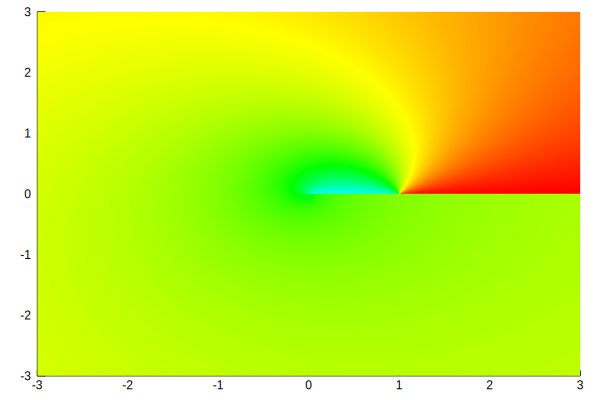

In [48]:
phaseplot(-3..3, -3..3, log1)

In [49]:
log1(-2.0+0.0im)

0.6931471805599453 + 3.141592653589793im

In [50]:
log1(-2.0-0.0im)

0.6931471805599453 + 3.141592653589793im

In [51]:
log1(-2.0)

0.6931471805599453 + 3.141592653589793im

In [52]:
log1(2.0+eps()im)

0.6931471805599453 + 1.1102230246251565e-16im

In [53]:
log1(2.0-eps()im)

0.6931471805599453 + 6.283185307179586im

## Problem 3.1

1. Because it's absolutely integrable, we can exchange derivatives and integrals to determine
$$
{\D \CC f \over \D z} = {1 \over 2 \pi \I} \oint {f(\zeta)\over (\zeta-z)^2} \D \zeta
$$
2. There are two different possible approaches:
   - the subtract and add back in technique: since $f$ is analytic for $z$ near $\zeta$, we can write
$$
\CC f(z) = {1 \over 2 \pi \I} \oint {f(\zeta)-f(z) \over (\zeta-z)^2} \D \zeta + f(z) \CC 1(z)
$$
Therefore
$$
\CC^+ f(\zeta) - \CC^- f(\zeta) = f(\zeta)( \CC^+ 1(\zeta) - \CC^- 1(\zeta))
$$
But we know (using Cauchy's integral formula / Residue calculus)
$$
\CC 1(z) = \begin{cases} 1 & |z| < 1 \\
                            0 & |z| > 0
                            \end{cases}
$$
hence $(\CC^+-\CC^-)1(\zeta) = 1$
   - Since $f$ is analytic, we have for any radius $R > 1$ but inside the annulus
$$
\CC^+ f(\zeta) = {1 \over 2 \pi \I} \oint_{|z| = R} {f(\zeta) \over \zeta -z} \D\zeta
$$
Similarly, for $\CC^-f(\zeta)$ with any radius $r < 1$ but inside the annulus. Therfore,
$$
\CC^+ f(\zeta) - \CC^- f(\zeta) = {1 \over 2 \pi \I} \left[\oint_{|z| = R} - \oint_{|z| = r} \right] {f(\zeta) \over \zeta -z} \D\zeta
$$
Deforming the contour and using Cauchy-integral formula gives the result. 
3. This follow since ${1 \over \zeta - z} \rightarrow 0$ uniformly.


## Problem 3.2

Suppose we have another solution $\phi$ and consider $\psi(z) = \phi(z) - \CC f(z)$. Then on the circle we have
$$
\psi_+(\zeta) - \psi_-(\zeta) = \phi_+(\zeta) - \CC_+f(\zeta) - \phi_-(\zeta) + \CC_+f(\zeta) = f(\zeta)-f(\zeta) = 0
$$
Thus $\psi$ is entire, and since it decays at infinity, it must be zero by Liouville's theorem.

## Problem 3.3

When $k \geq 0$, we have from 3.1 and 3.2
$$
\CC[\diamond^k](z) =\begin{cases}
    z^k  & |z| < 0 \\
    0 & |z| > 0
    \end{cases}
$$
when $k < 0$ since
$$\CC[\diamond^k]^+(\zeta) - \CC[\diamond^k]^-(\zeta) = \zeta^k - 0 = \zeta^k$$. we similarly have 
$$
\CC[\diamond^k](z) =\begin{cases}
0  & |z| < 0 \\
    -z^k & |z| > 0
        \end{cases}
$$

Therefore,
$$
\Im \CC^-[\diamond^k](\zeta) =\begin{cases}
0  & k \geq 0 \\
    -{\zeta^k - \zeta^{-k} \over 2 \I} & k < 0
        \end{cases}
$$
and
$$
\Re \CC^-[\diamond^k](\zeta) =\begin{cases}
0  & k \geq 0 \\
    -{\zeta^k + \zeta^{-k} \over 2} & k < 0
        \end{cases}
$$



## Problem 3.4

Express the solution outside the circle as
$$
v(x,y) = \Im ( \E^{-\I \theta} z + \CC f(z))
$$
for a to-be-determined $f$. On the circle, this reduces to
$$
\Im \CC^- f(\zeta) = -\cos \theta {\zeta - \zeta^{-1} \over 2 \I}  + \sin \theta {\zeta + \zeta^{-1} \over 2}
$$
Unlike the real case, we can include imaginary coefficients, thus the solution is
$$
f(\zeta) = (\cos \theta + \I \sin \theta) \zeta^{-1}
$$
and thus the full solution is
$$
v(x,y) =  \Im ( \E^{-\I \theta} z - \E^{\I \theta}   z^{-1}))
$$

In [54]:
θ = 0.1
v = (x,y) -> x^2 + y^2 < 1 ? 0 : imag(exp(-im*θ) * (x+im*y) + exp(im*θ) * (x+im*y)^(-1))

#21 (generic function with 1 method)

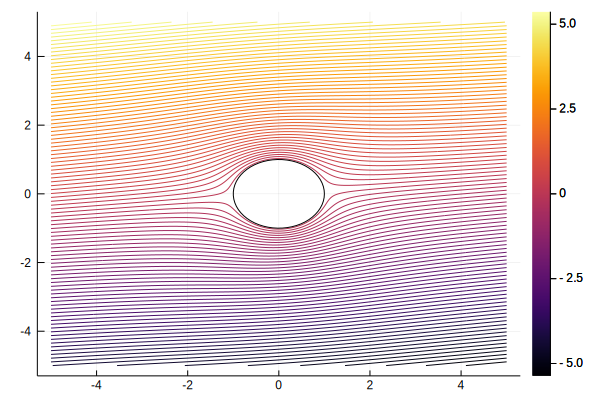

In [58]:
xx = yy = -5:0.01:5

contour(xx, yy, v.(xx', yy); nlevels=100)
plot!(Circle(); color=:black, legend=false)

## Problem 4.1

$z^\alpha$ has the limits $z_\pm^\alpha = \E^{\pm \I  \pi \alpha} |z|^\alpha$, thus choose $\alpha = -{\theta \over 2\pi}$ where if we take $0 < \theta < 2\pi$ we have $0 < \alpha < 1$ (the case $\theta = 0$ and $\theta = \pi$ are covered by the Cauchy transform, that is ). Then consider
$$
\kappa(z) = (z-1)^{-\alpha} (z+1)^{\alpha-1}
$$
which has weaker than pole singularities and satisfies $\kappa(z) \sim z^{-1}$.
For $-1 < x < 1$ it has the right jump
$$
\kappa_+(x) = (x-1)_+^\alpha (x+1)^{1 - \alpha}  = \E^{\I \pi \alpha} (1-x)^\alpha (x+1)^{1 - \alpha} = \E^{2\I \pi \alpha} (x-1)_-^\alpha (x+1)^{1 - \alpha} = \E^{2 \I \pi \alpha} \kappa_-(x)= \E^{\I \theta} \kappa_-(x)
$$
and  for $x < -1$ it has the jump
$$
\kappa_+(x) = (x-1)_+^\alpha (x+1)_+^{1 - \alpha}  = \E^{\I \pi \alpha}\E^{\I \pi (1-\alpha)} (1-x)^\alpha (-1-x)^{1 - \alpha} =  \kappa_-(x)
$$
hence $\kappa$ is analytic.  

We need to show this times a constant spans the entire space. Suppose we have another solution $\tilde \kappa$ and consider $r(z) = {\tilde \kappa(z) \over \kappa(z)}$. Note by construction that $\kappa$ has no zeros. Then
$$
r_+(x) = {\tilde\kappa_+(x) \over \kappa_+(x)} = {\tilde\kappa_-(x) \over \kappa_-(x)} = r_-(x)
$$
hence $r$ is analytic on $(-1,1)$. It has weaker than pole singularities because $\kappa(z)^{-1}$ is actually bounded at $\pm 1$. Therefore $r$ is bounded and entire, and thus must be a constant $r(z) \equiv r$, and thence $\tilde \kappa(z) = r \kappa(z)$.

In [59]:
θ =2.3
α = -θ/(2π)
κ = z -> (z-1)^(-α)*(z+1)^(α-1)
κ(0.1+0.0im) - exp(im*θ)*κ(0.1-0.0im)

0.0 + 1.1102230246251565e-16im

In [60]:
κ(100.0)

0.00982876598532333

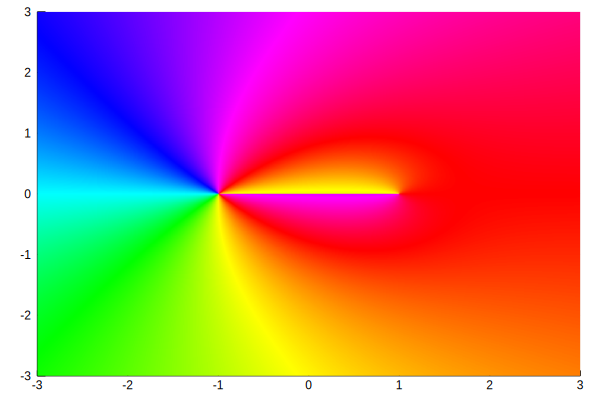

In [62]:
phaseplot(-3..3, -3..3, κ)

## Problem 4.2

We want to mimic the solution of $\phi_+(x) + \phi_-(x)$. So take
$$
\phi(z) = \kappa(z) \CC\br[{f \over \kappa_+}](z) =\E^{-\I \theta/2} (z-1)^{-\alpha}(z+1)^{\alpha-1} \CC[f (1-x)^{\alpha}(1+x)^{1-\alpha}](z)
$$
This has the jump
\begin{align*}
\phi_+(x) - \E^{\I \theta}\phi_-(x)  = \kappa_+(z) \CC_+\br[{f \over \kappa_+}](x) -  \E^{\I \theta}\kappa_-(z)\CC_-\br[{f \over \kappa_+}](x)  = \kappa_+(x)  \pr({\CC_+\br[{f \over \kappa_+}](x) - \CC_-\br[{f \over \kappa_+}](x)  }) = f(x)
\end{align*}

Thus the general solution is $\phi(z) + C \kappa(z)$.

In [63]:
θ =2.3
α = -θ/(2π)
κ = z -> (z-1)^(-α)*(z+1)^(α-1)


x = Fun()
κ₊ = exp(im*θ/2)*(1-x)^(-α)*(x+1)^(α-1)

f = Fun(exp)

z = 2+im
φ = z -> κ(z)*cauchy(f/κ₊, z)

φ(0.1+0.0im)-exp(im*θ)*φ(0.1-0.0im) - f(0.1)

8.881784197001252e-16 - 2.220446049250313e-16im

## Problem 4.3

Note for $x < 0$
$$
x_+^{\I \beta} = \E^{\I \beta \log_+ x} = \E^{\I \beta \log_- x - 2\pi y} = \E^{-2 \pi \beta} x_-^{\I \beta}
$$

In [64]:
β =  2.3;
x = -2.0
(x+0.0im)^(im*β) - exp(-2π*β)*(x-0.0im)^(im*β)

-3.3881317890172014e-21 + 1.0842021724855044e-19im

We actually have bounded (oscillatory) growth near zero since 
$$
|\E^{\I \beta \log z}| = |\E^{\I \beta \log |z|} \E^{-\beta \arg z}| = \E^{-\beta \arg z}
$$

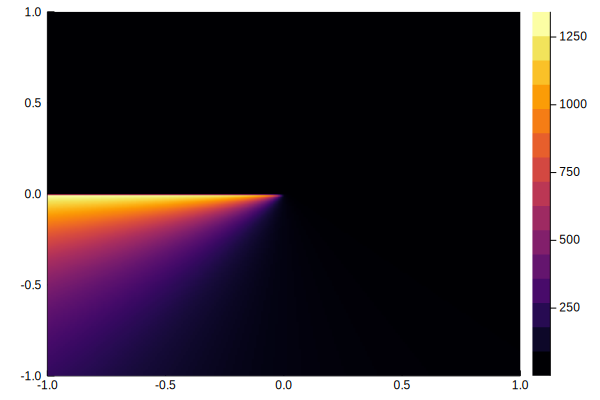

In [67]:
xx = yy = -1:0.01:1
contourf(xx, yy, abs.((xx' .+ im.*yy).^(im*β)))

Thus if we write $c = r \E^{\I \theta}$ for $0 < \theta < 2 \pi$ and define $\alpha = -{\theta \over 2 \pi} + \I{\log r \over 2 \pi}$ we can write the solution to 4.1 as
$$
\kappa(z) = (z-1)^{-\alpha} (z+1)^{\alpha-1}
$$

The same arguments as before then proceed. and the solution to 4.3 is 
$$
\phi(z) = \kappa(z) \CC\br[{f \over \kappa_+}](z)+ C \kappa(z)
$$

In [68]:
θ =2.3
α = -θ/(2π)
κ = z -> (z-1)^(-α)*(z+1)^(α-1)
κ(0.1+0.0im) - exp(im*θ)*κ(0.1-0.0im)

0.0 + 1.1102230246251565e-16im

In [69]:
r = 2.4
θ = 2.1
c = r*exp(im*θ)

α = -θ/(2π) + im*log(r)/(2π)

κ = z -> (z-1)^(-α)*(z+1)^(α-1)


κ(0.1+0.0im)-c*κ(0.1-0.0im)

2.220446049250313e-16 + 2.220446049250313e-16im

## Problem 5.1

1. It is a product of functions analytic off $(-\infty,1]$ hence is analytic off $(-\infty,1]$, and we just have to check that it has no jump on $(-\infty,-1)$ and $(-a,a)$. This follows via, for $x < -1$:
$$
\kappa_+(x) = {1 \over \I^4 \sqrt{1-x}\sqrt{-1-x}\sqrt{a-x}\sqrt{-a-x}} = {1 \over (-\I)^4 \sqrt{1-x}\sqrt{-1-x}\sqrt{a-x}\sqrt{-a-x}} = \kappa_-(x)
$$
and for $-a < x < a$ we have
$$
\kappa_+(x) = {1 \over \I^2 \sqrt{1-x}\sqrt{x+1}\sqrt{a-x}\sqrt{x+a}} = {1 \over (-\I)^2 \sqrt{1-x}\sqrt{1+x}\sqrt{a-x}\sqrt{-a-x}} = \kappa_-(x)
$$
2. This follows via the usual arguments: for $a < x < 1$ we have:
$$
\kappa_+(x) = {1 \over \I \sqrt{1-x}\sqrt{x+1}\sqrt{x-a}\sqrt{x+a}} =  -\kappa_-(x)
$$
and for $-1 < x < -a$ we have
$$
\kappa_+(x) = {1 \over \I^3 \sqrt{1-x}\sqrt{x+1}\sqrt{x-a}\sqrt{x+a}} =  -\kappa_-(x)
$$
3. This has at most square singularitie4s which are weaker than poles
4. $\kappa(z) = {1 \over z^2 \sqrt{1-1/z}\sqrt{1-a/z} \sqrt{1+a/z} \sqrt{1+1/z}} \sim {1 \over z^2} \rightarrow 0$. 

## Problem 5.2

Ah, this is a trick question! Note that $z \kappa(z) \sim z^{-1} = O(z)$ and satisfies all the other properties. Thus consider any other solution $\tilde \kappa(z)$ and write
$$
r(z) = {\tilde \kappa(z) \over \kappa(z) }
$$
This has trivial jumps and hence is entire: for example, on $(a,1)$ we have
$$
r_+(x) = {\tilde \kappa_+(x) \over \kappa_+(x) }  = {-\tilde \kappa_-(x) \over -\kappa_-(x) }  = r_-(x)
$$
But since $\kappa \sim O(z^{-2})$ we only know that $\kappa$ has at most $O(z)$ growth, hence it can be any first degree polynomial.  Therefore, the space of all solutions is in fact two-dimensional: $\psi(z) = (A + Bz) \kappa(z)$.

## Problem 5.3

Here we mimick the usual solution techniques and propose:
$$
\phi(z) = \kappa(z) \CC\br[{f \over \kappa_+}](z) + (A+Bz) \kappa(z)
$$
A quick check confirms it has the right jumps:
$$
\phi_+(x) = \kappa_+(x) \CC_+\br[{f \over \kappa_+}](x) + (A+Bx) \kappa_+(x) =\kappa_+(x) \left({f(x) \over \kappa_+(x)} + \CC_-\br[{f \over \kappa_+}](x)\right) - (A+Bx) \kappa_-(x) = -\phi_-(x) + f(x)
$$

## Problem 6.1

Let's first do a plot and histogram. Here we see the right scaling is $N^{1/4}$:

In [71]:
V = x -> x^4
Vp = x -> 4x^3

N = 100
λ⁰ = randn(N)  # initial location
prob = ODEProblem((λ,t,_) -> Float64[sum(1 ./(λ[k] .- λ[[1:k-1;k+1:end]])) - Vp(λ[k]) for k=1:N], λ⁰, (0.0, 10.0))
λ = solve(prob; reltol=1E-6);

In [73]:
@gif for t=0.0:0.05:7.0
    scatter(λ(t)/N^(1/4) ,zeros(N); label="charges", xlims=(-2,2), title="t = $t")
end

┌ Info: Saved animation to 
│   fn = /Users/sheehanolver/Documents/Teaching/Imperial/M3M6 Methods of Mathematical Physics/2018/tmp.gif
└ @ Plots /Users/sheehanolver/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/Users/sheehanolver/Documents/Teaching/Imperial/M3M6 Methods of Mathematical Physics/2018/tmp.gif")

The limiting distribution has the following form:

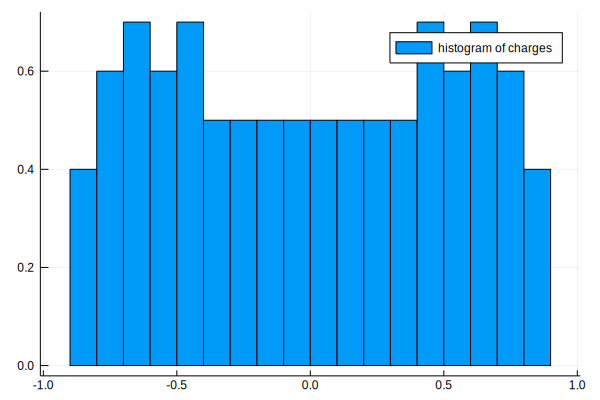

In [74]:
histogram(λ(10.0)/N^(1/4); nbins=30, normalize=true, label="histogram of charges")


We want to solve
$$
{\D \lambda_k \over \D t} = \sum_{j=1 \atop j \neq k}^N {1 \over \lambda_k -\lambda_j} - 4\lambda_k^3
$$
Rescale via $\mu_k = {\lambda_k \over N^{1/4}}$ gives
$$
0 = N^{1/4} {\D \mu_k \over \D t} = N^{-1/4} \sum_{j=1 \atop j \neq k}^N {1 \over \mu_k -\mu_j} - 4 N^{3/4} \mu_k^3
$$
or in other words
$$
0 = N^{-1/2} {\D \mu_k \over \D t} = {1 \over N} \sum_{j=1 \atop j \neq k}^N {1 \over \mu_k -\mu_j} - 4 \mu_k^3
$$
We can now formally let $N\rightarrow \infty$ to get our equation
$$
\dashint_{-b}^b {w(t) \over x-t} \dt = 4 x^3
$$
where I've used symmetry to assume that the interval is symmetric. 
We want to find $w$ and $b$ so that this equations holds true and $w$ is a bounded probability density:
1. $w(x) >0$ for $-b < x < b$
2. $\int w(x) \dx = 1$
3. $w$ is bounded


Our equation is equivalent to
$$
\HH_{[-b,b]} w(x) = -{4 x^3 \over \pi}
$$
recall the inversion formula
$$
    u(x) =  {-1 \over \sqrt{b^2 - x^2}}\HH \left[{ f(\diamond)  \sqrt{b^2-\diamond^2} }\right](x)  - {C \over \sqrt{b^2-x^2}}
$$  
In our case $f(x) = -{4 x^3 \over \pi}$ and we use
$$
\sqrt{z-b}\sqrt{z+b} = z\sqrt{1-b/z}\sqrt{1+b/z} = z - {b^2 \over 2 z} -{b^4 \over 8z^3} + O(z^{-4})
$$
to determine
$$
2 \I \CC \left[{ \diamond^3  \sqrt{b^2-\diamond^2} }\right](x) = z^3(\sqrt{z-b}\sqrt{z+b} -z +  {b^2 \over 2 z} + {b^4 \over 8z^3}) = z^3\sqrt{z-b}\sqrt{z+b} -z^4 +  {b^2z^2 \over 2} + {b^4 \over 8}
$$

In [75]:
b = 5
x = Fun(-b .. b)
(2im)cauchy(x^3*sqrt(b^2-x^2),z)

71.6687198577313 + 40.090510492433154im

Therefore,
\begin{align*}
u(x) = {4\I \over \pi \sqrt{b^2 - x^2}}(\CC^+ + \CC^-) \left[{ \diamond^3  \sqrt{b^2-\diamond^2} }\right](x)  - {C \over \sqrt{b^2-x^2}} \\
{4 \over \pi \sqrt{b^2 - x^2}}(-x^4+{b^2 x^2 \over 2} + {b^4 \over 8})- {C \over \sqrt{b^2-x^2}} 
\end{align*}
We choose $C$ so this is bounded, in particular, we get get the solution
$$
u(x) = {4 \over \pi \sqrt{b^2 - x^2}}(-x^4+{b^2 x^2 \over 2} + {b^4 \over 2})
$$

In [76]:
u = 4/(π*sqrt(b^2-x^2))*(-x^4 + b^2*x^2/2 + b^4/2)
hilbert(u, 0.1)

-0.0012732395447351292

In [77]:
-4*0.1^3/π

-0.001273239544735163

At least it looks right, we just need to get the right b:

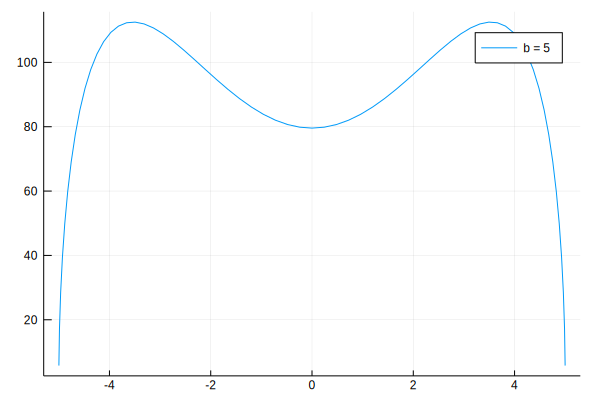

In [78]:
plot(u; label = "b = $b")

We want to choose $b$ now so that this integrates to $1$. For example, this choice of $b$ is horrible:

In [79]:
sum(u)

937.5

There's a nice trick: If $-2\pi \I \CC u(z) \sim {1 \over  z}$ then $\int_{-b}^b u(x) \dx  = 1$.  We know since
$$
{1 \over \sqrt{1+z}} = 1 - {z \over 2} + {3z^2 \over 8} - {5z^3 \over 16} + O(z^4)
$$
\begin{align*}
 {-z^4 +  {b^2z^2 \over 2} + {b^4 \over 2} \over \sqrt{z-b}\sqrt{z+b}} &=  {-z^3 +  {b^2z \over 2} + {b^4 \over 2 z} \over \sqrt{1-b/z}\sqrt{1+b/z}} \\
 &=  (-z^3 +  {b^2z \over 2} )(1 + {b \over 2 z} + {3 b^2 \over 8 z^2} + {5 b^3 \over 16z^3} )(1 - {b \over 2 z} + {3 b^2 \over 8 z^2}  - {5 b^3 \over 16z^3}) + O(z^{-1}) \\
 &=-z^3  + \pr({b^2  \over 2} +{b^2 \over 4} + {b^2 \over 2} - {3 b^2 \over 8} -{3 b^2 \over 8} ) z +O(z^{-1})\\
 &= -z^3 + O(z^{-1})
 \end{align*}
Thus we know
$$
\CC  u(z) = {2\I \over \pi} z^3 +{2 \I \over \pi} {-z^4 +  {b^2z^2 \over 2} + {b^4 \over 2} \over \sqrt{z-b}\sqrt{z+b}}
$$

In [80]:
cauchy(u, z)

40.55106915762885 + 9.075717966750503im

In [81]:
z =100.0im;
2im/π*z^3 + 2im/π*(-z^4 + b^2*z^2/2 +b^4/2)/(sqrt(z-b)sqrt(z+b))

1.4908359390683472 - 0.0im

taking this one term further we find  
$$
 {-z^4 +  {b^2z^2 \over 2} + {b^4 \over 2} \over \sqrt{z-b}\sqrt{z+b}} = -z^3 +{3 b^4 \over 8 z} + O(z^{-2})
 $$
Hence we want to choose $b$ so that
$$
-2\I\pi \CC u(z) = {3 b^4 \over 2 z} \sim {1 \over z}
$$
in other words, $b = ({2 \over 3})^{1/4}$

In [82]:
b = (2/3)^(1/4)
x = Fun(-b .. b)
u = 4/(π*sqrt(b^2-x^2))*(-x^4 + b^2*x^2/2 + b^4/2)
sum(u)

0.9999999999999997

And it worked!

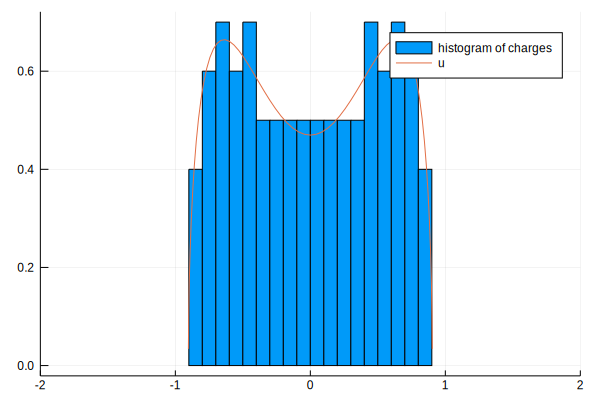

In [83]:
histogram(λ(10.0)/N^(1/4); nbins=25, normalize=true, label="histogram of charges")
plot!(u; label="u",xlims=(-2,2))